In [145]:
import pandas as pd
data = pd.read_csv('kerala_floods.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO


##Problem Statement
What is the probability of rainfall more than 500mm in the month of June, provided that it flooded in that year in Kerala? Calculate using Bayes' Theorem.


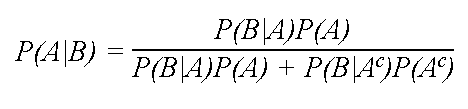

In [146]:
data['rainfall_in_june_500']=(data['JUN']>500).astype('int')

In [147]:
data['FLOODS']=data['FLOODS'].map({'YES':1,'NO':0})

In [149]:
df=data.loc[:,['YEAR','rainfall_in_june_500','FLOODS']]

In [150]:
df.head()

,YEAR,rainfall_in_june_500,FLOODS
0,1901,1,1
1,1902,0,1
2,1903,1,1
3,1904,1,1
4,1905,1,0


In [151]:
#cross-tabulation
#Cross tabulation is used to quantitatively analyze the relationship between multiple variables
pd.crosstab(df['FLOODS'],df['rainfall_in_june_500'],margins=True)

rainfall_in_june_500,0,1,All
FLOODS,,,
0,19,39,58
1,6,54,60
All,25,93,118


In [153]:
#prob. of rainfall >500m
p_rain500=round(93/118,3)

In [154]:
p_rain500

0.788

In [155]:
#prob floods
p_floods=round(60/118,3)

In [156]:
p_floods

0.508

In [157]:
#prob. of floods and raining more than 500m

In [159]:
p_floodrain

0.458

In [160]:
#prob. of floods given that it rained more than 500m
p_floods_given_that_it_rained=round(p_floodrain/p_rain500,3)

In [161]:
p_floods_given_that_it_rained

0.581

In [162]:
p_lessthan500=round(25/118,3)

In [163]:
p_lessthan500

0.212

In [164]:
#prob. of floods given that it rained less than 500m
p_floods_given_that_it_rained_less=round(6/25,3)

In [165]:
p_floods_given_that_it_rained_less

0.24

In [169]:
(p_rain500*p_floods_given_that_it_rained)/((p_rain500*p_floods_given_that_it_rained)+(p_lessthan500*p_floods_given_that_it_rained_less))

0.8999819149689016